# Timeseries 

vrste podatkov
- timestamp
- intervali
- timedelta

In [1]:
import numpy as np
import pandas as pd

## Dates and Times in Python

### Native Python dates and times: datetime

Knjiznica datetime vsebuje glavne 4 module
- date
- time
- datetime
- timedelta

In [8]:
from datetime import datetime
a:datetime = datetime(year=2019, month=7, day=4, hour=13, minute=22)
print(a)
type(a)

2019-07-04 13:22:00


datetime.datetime

In [27]:
now = datetime.now()
print(f"trenuten čas: {now}")

trenuten čas: 2022-12-12 16:34:25.170986


In [29]:
# unix timestamp, time epoch
datetime.now().timestamp()

1670859303.990702

In [38]:
# iz unix time v python
unix_time = 1670849303.990702
print(datetime.fromtimestamp(unix_time))


2022-12-12 13:48:23.990702


In [39]:
# date module
from datetime import date
print(date.fromtimestamp(unix_time))

2022-12-12


In [ ]:
from datetime import date



print("Date =", timestamp)

In [42]:
from datetime import timedelta

timedelta(hours=3)
print(f"Trenuten čas: {datetime.now()}")
print(f"Čez tri ure: {datetime.now()+timedelta(hours=3)}")

Trenuten čas: 2022-12-12 16:43:40.179696
Čez tri ure: 2022-12-12 19:43:40.179766


### Timezones
Poglej si knjižnico https://pypi.org/project/pytz/ ki olajša delo s časovnimi pasi

In [56]:
trenuten_cas = datetime.now()
print(trenuten_cas)

2022-12-12 16:56:20.262223


In [60]:
import pytz

pytz.timezone("Europe/Ljubljana")

<DstTzInfo 'Europe/Ljubljana' LMT+1:22:00 STD>

In [66]:
ljubljana_time = datetime.now(pytz.timezone("Europe/Ljubljana"))
us_central = ljubljana_time.astimezone(pytz.timezone("US/Central"))
print(ljubljana_time)
print(us_central)

2022-12-12 17:02:49.754112+01:00
2022-12-12 10:02:49.754112-06:00


### pretvarjanje med datetime <-> string

https://strftime.org/
https://docs.python.org/3/library/datetime.html -> search for "strftime() and strptime() Format Codes"

In [47]:
# pretovrba str -> datetime
moj_cas = "2022#12#12T16:43:40"
moj_cas_as_time = datetime.strptime(moj_cas, "%Y#%m#%dT%H:%M:%S")
moj_cas_as_time


datetime.datetime(2022, 12, 12, 16, 43, 40)

In [52]:
# pretvorba iz datetime -> str
cas_as_string = datetime.now().strftime("%H:%M:%S")
cas_as_string
date_as_string = datetime.now().strftime("%Y-%m-%d")
date_as_string

'2022-12-12'

In [ ]:
from datetime import datetime


t = now.strftime("%H:%M:%S")
print("time:", t)
print(type(t))

In [ ]:
s1 = now.strftime("%m/%d/%Y, %H:%M:%S")

print("s1:", s1)

In [ ]:
s2 = now.strftime("%d/%m/%Y, %H:%M:%S")

print("s2:", s2)

In [ ]:


date_string = "21 June, 2018"
print("date_string =", date_string)



### Native Python dates and times: dateutil

Knjižnica, ki se uporablja za parsanje raznih oblik stringov v datetime

In [53]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

## Typed arrays of times: NumPy's datetime64

In [67]:
# init datetime object in numpy
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [69]:
# druga moznost kako lahko inicializiramo
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [70]:
# po defaultu povečuje dneve
np.arange(12) + date

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [71]:
# lahko inicializiramo objekt s casom
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [74]:
# s paremetrom 'ns' dolocimo natancnost
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

Natančnost je pomembna -> večja natančnost pomeni manjši obseg podatkov

<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th>Code</th>
<th>Meaning</th>
<th>Time span (relative)</th>
<th>Time span (absolute)</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Y</code></td>
<td>Year</td>
<td>± 9.2e18 years</td>
<td>[9.2e18 BC, 9.2e18 AD]</td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month</td>
<td>± 7.6e17 years</td>
<td>[7.6e17 BC, 7.6e17 AD]</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Week</td>
<td>± 1.7e17 years</td>
<td>[1.7e17 BC, 1.7e17 AD]</td>
</tr>
<tr>
<td><code>D</code></td>
<td>Day</td>
<td>± 2.5e16 years</td>
<td>[2.5e16 BC, 2.5e16 AD]</td>
</tr>
<tr>
<td><code>h</code></td>
<td>Hour</td>
<td>± 1.0e15 years</td>
<td>[1.0e15 BC, 1.0e15 AD]</td>
</tr>
<tr>
<td><code>m</code></td>
<td>Minute</td>
<td>± 1.7e13 years</td>
<td>[1.7e13 BC, 1.7e13 AD]</td>
</tr>
<tr>
<td><code>s</code></td>
<td>Second</td>
<td>± 2.9e12 years</td>
<td>[ 2.9e9 BC, 2.9e9 AD]</td>
</tr>
<tr>
<td><code>ms</code></td>
<td>Millisecond</td>
<td>± 2.9e9 years</td>
<td>[ 2.9e6 BC, 2.9e6 AD]</td>
</tr>
<tr>
<td><code>us</code></td>
<td>Microsecond</td>
<td>± 2.9e6 years</td>
<td>[290301 BC, 294241 AD]</td>
</tr>
<tr>
<td><code>ns</code></td>
<td>Nanosecond</td>
<td>± 292 years</td>
<td>[ 1678 AD, 2262 AD]</td>
</tr>
<tr>
<td><code>ps</code></td>
<td>Picosecond</td>
<td>± 106 days</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>fs</code></td>
<td>Femtosecond</td>
<td>± 2.6 hours</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>as</code></td>
<td>Attosecond</td>
<td>± 9.2 seconds</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
</tbody>
</table>

</div>
</div>
</div>

## Dates and times in pandas: best of both worlds

<table class="table">
<colgroup>
<col style="width: 15%">
<col style="width: 12%">
<col style="width: 13%">
<col style="width: 31%">
<col style="width: 28%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Concept</p></th>
<th class="head"><p>Scalar Class</p></th>
<th class="head"><p>Array Class</p></th>
<th class="head"><p>pandas Data Type</p></th>
<th class="head"><p>Primary Creation Method</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Date times</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timestamp</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DatetimeIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">datetime64[ns]</span></code> or <code class="docutils literal notranslate"><span class="pre">datetime64[ns,</span> <span class="pre">tz]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_datetime</span></code> or <code class="docutils literal notranslate"><span class="pre">date_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Time deltas</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timedelta</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">TimedeltaIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">timedelta64[ns]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_timedelta</span></code> or <code class="docutils literal notranslate"><span class="pre">timedelta_range</span></code></p></td>
</tr>
<tr class="row-even"><td><p>Time spans</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">PeriodIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">period[freq]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code> or <code class="docutils literal notranslate"><span class="pre">period_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Date offsets</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
</tr>
</tbody>
</table>

In [78]:
date = pd.to_datetime("4th of July, 2015")
print(type(date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [80]:
# metode ki smo jih spoznali pri datetime knjižnici tudi delujejo na pd date objektu
print(date.strftime("%A"))

Saturday


In [84]:
# timedelta
pd.to_timedelta(np.arange(12), "D") + pd.to_datetime("4th of July, 2015")

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [75]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [ ]:
pd.to_datetime('7/8/1952')

In [85]:
# ameriski ali evropski nacin
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [86]:
# razlicni tipi stringov
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [88]:
# specificiraj za kaksen format gre
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [91]:
# za index nastavimo datetime podatke
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])

data = pd.Series([0, 1, 2, 3], index=index)

In [90]:
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [92]:
# to omogoča slicanje po času
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [94]:
# vse iz leta 2015
data["2015"]

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

In [95]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [96]:
dates.to_period("D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [101]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences

In [102]:
# date range
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [103]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [104]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [105]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [106]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## The data

<ul>
<li><code>Date</code> — The date (<em>yyyy-mm-dd</em> format)</li>
<li><code>Consumption</code> — Electricity consumption in GWh</li>
<li><code>Wind</code> — Wind power production in GWh</li>
<li><code>Solar</code> — Solar power production in GWh</li>
<li><code>Wind+Solar</code> — Sum of wind and solar power production in GWh</li>
</ul>

### Getting the data

Getting the data from: https://data.open-power-system-data.org/time_series/2018-06-30

In [120]:
#Download hourly data from OPSD website
url = 'https://data.open-power-system-data.org/time_series/2018-06-30/'
datafile = url + 'time_series_60min_singleindex.csv'
df_all = pd.read_csv(datafile, index_col='utc_timestamp', parse_dates=True, low_memory=False) # read csv lahko bere direktno iz URL-ja
df_all.head()

,cet_cest_timestamp,AL_load_entsoe_power_statistics,AT_load_entsoe_power_statistics,AT_load_entsoe_transparency,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_entsoe_power_statistics,BA_load_entsoe_transparency,BE_load_entsoe_power_statistics,BE_load_entsoe_transparency,...,SI_price_day_ahead,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_entsoe_power_statistics,SK_load_entsoe_transparency,SK_price_day_ahead,SK_solar_generation_actual,TR_load_entsoe_power_statistics,UA_west_load_entsoe_power_statistics,interpolated_values
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2005-12-31 23:00:00+00:00,2006-01-01T00:00:00+0100,NaN,6297.0,NaN,NaN,NaN,1425.0,NaN,9829.0,NaN,...,NaN,NaN,NaN,3332.0,NaN,NaN,NaN,NaN,719.0,NaN
2006-01-01 00:00:00+00:00,2006-01-01T01:00:00+0100,NaN,6005.0,NaN,NaN,NaN,1358.0,NaN,9447.0,NaN,...,NaN,NaN,NaN,3165.0,NaN,NaN,NaN,NaN,695.0,NaN
2006-01-01 01:00:00+00:00,2006-01-01T02:00:00+0100,NaN,5743.0,NaN,NaN,NaN,1283.0,NaN,9062.0,NaN,...,NaN,NaN,NaN,3040.0,NaN,NaN,NaN,NaN,654.0,NaN
2006-01-01 02:00:00+00:00,2006-01-01T03:00:00+0100,NaN,5397.0,NaN,NaN,NaN,1175.0,NaN,8589.0,NaN,...,NaN,NaN,NaN,3021.0,NaN,NaN,NaN,NaN,644.0,NaN
2006-01-01 03:00:00+00:00,2006-01-01T04:00:00+0100,NaN,5213.0,NaN,NaN,NaN,1134.0,NaN,8247.0,NaN,...,NaN,NaN,NaN,2959.0,NaN,NaN,NaN,NaN,638.0,NaN


In [108]:
# koliko pomnilnika (RAM) porabi ta df
df_all.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108817 entries, 2005-12-31 23:00:00+00:00 to 2018-05-31 23:00:00+00:00
Columns: 216 entries, cet_cest_timestamp to interpolated_values
dtypes: float64(214), object(2)
memory usage: 190.8 MB


In [110]:
def extract_country(df_all, country_code, year_min=None, year_max=None):
    """Extract data for a single country"""
    
    # List of columns to extract
    columns = [col for col in df_all.columns if col.startswith(country_code)]
    
    # Extract columns and remove country codes from column labels
    columns_map = {col : col[3:] for col in columns}
    df_out = df_all[columns].rename(columns=columns_map)
    
    # Exclude years outside of specified range, if any
    if year_min is not None:
        df_out = df_out[df_out.index.year >= year_min]
    if year_max is not None:
        df_out = df_out[df_out.index.year <= year_max]
        
    return df_out

In [121]:
# Extract data for Germany, for complete years 2006-2017 
# (exclude incomplete years 2005 and 2018)
df_hrly = extract_country(df_all, country_code='DE', year_min=2006, year_max=2017)

# Rename columns for convenience
cols_map = {'load_entsoe_power_statistics' : 'Consumption',
            'wind_generation_actual' : 'Wind',
            'solar_generation_actual' : 'Solar'}
df_hrly = df_hrly[list(cols_map.keys())].rename(columns=cols_map)

# Compute wind + solar generation
df_hrly['Wind+Solar'] = df_hrly[['Wind', 'Solar']].sum(axis=1, skipna=False)

# Convert from MW to GW
df_hrly = df_hrly / 1000
df_hrly.head()

,Consumption,Wind,Solar,Wind+Solar
utc_timestamp,,,,
2006-01-01 00:00:00+00:00,47.823,NaN,NaN,NaN
2006-01-01 01:00:00+00:00,43.444,NaN,NaN,NaN
2006-01-01 02:00:00+00:00,41.432,NaN,NaN,NaN
2006-01-01 03:00:00+00:00,40.508,NaN,NaN,NaN
2006-01-01 04:00:00+00:00,38.865,NaN,NaN,NaN


In [122]:
# Compute daily totals in GWh
df_daily = df_hrly.resample('D').sum(min_count=24)
df_daily = df_daily.rename_axis('Date')
df_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01 00:00:00+00:00,1069.184,NaN,NaN,NaN
2006-01-02 00:00:00+00:00,1380.521,NaN,NaN,NaN
2006-01-03 00:00:00+00:00,1442.533,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,1457.217,NaN,NaN,NaN
2006-01-05 00:00:00+00:00,1477.131,NaN,NaN,NaN


In [123]:
df_daily.to_csv('data/INPUT_opsd_germany_daily.csv')

## Time series data structures

## Creating a time series DataFrame

In [124]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv')

In [128]:
opsd_daily.shape

(4383, 5)

In [129]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [130]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [133]:
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [132]:
opsd_daily["Date"] = pd.to_datetime(opsd_daily["Date"])

In [136]:
%%time
test = pd.read_csv('data/opsd_germany_daily.csv')
test["Date"] = pd.to_datetime(test["Date"])

CPU times: user 5.69 ms, sys: 257 µs, total: 5.95 ms
Wall time: 5.28 ms


In [137]:
%%time
test2 = pd.read_csv('data/opsd_germany_daily.csv')
test2["Date"] = pd.to_datetime(test2["Date"], format="%Y-%m-%d") # dela hitreje ker smo podali format in pandas ne rabi ugibat

CPU times: user 8.42 ms, sys: 0 ns, total: 8.42 ms
Wall time: 7.72 ms


In [ ]:
opsd_daily = opsd_daily.set_index("Date")

In [143]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [146]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

In [147]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


In [160]:
# pogled nakljucnih  n podatkov: opsd_daily.sample(n)
opsd_daily.sample(10)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2015-11-17,1542.282,493.618,15.270,508.888,2015,11,Tuesday
2013-05-01,1004.860,57.722,134.309,192.031,2013,5,Wednesday
2015-04-12,1122.555,300.331,159.134,459.465,2015,4,Sunday
2012-10-24,1448.872,6.511,24.754,31.265,2012,10,Wednesday
2016-10-28,1480.316,375.774,40.042,415.816,2016,10,Friday
2006-09-26,1424.304,NaN,NaN,NaN,2006,9,Tuesday
2016-10-26,1495.441,78.295,35.981,114.276,2016,10,Wednesday
2010-09-03,1352.272,12.395,NaN,NaN,2010,9,Friday
2009-07-20,1205.019,NaN,NaN,NaN,2009,7,Monday


## Time-based indexing

In [161]:
opsd_daily.loc["2017-01-10"]

Consumption     1639.046
Wind             280.373
Solar             13.045
Wind+Solar       293.418
Year                2017
Month                  1
Weekday Name     Tuesday
Name: 2017-01-10 00:00:00, dtype: object

In [162]:
opsd_daily.loc["2014-01-29":"2014-02-07"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-29,1659.960,213.550,24.072,237.622,2014,1,Wednesday
2014-01-30,1651.529,167.885,37.222,205.107,2014,1,Thursday
2014-01-31,1605.265,112.603,45.499,158.102,2014,1,Friday
2014-02-01,1391.430,282.132,41.298,323.430,2014,2,Saturday
2014-02-02,1265.416,107.799,33.744,141.543,2014,2,Sunday
2014-02-03,1598.551,108.910,35.126,144.036,2014,2,Monday
2014-02-04,1617.799,131.890,44.494,176.384,2014,2,Tuesday
2014-02-05,1623.241,217.711,49.166,266.877,2014,2,Wednesday
2014-02-06,1597.979,288.646,67.497,356.143,2014,2,Thursday


In [165]:
opsd_daily.loc["2012-02"].head(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


## Visualizing time series data

In [166]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [167]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

<AxesSubplot: xlabel='Date'>

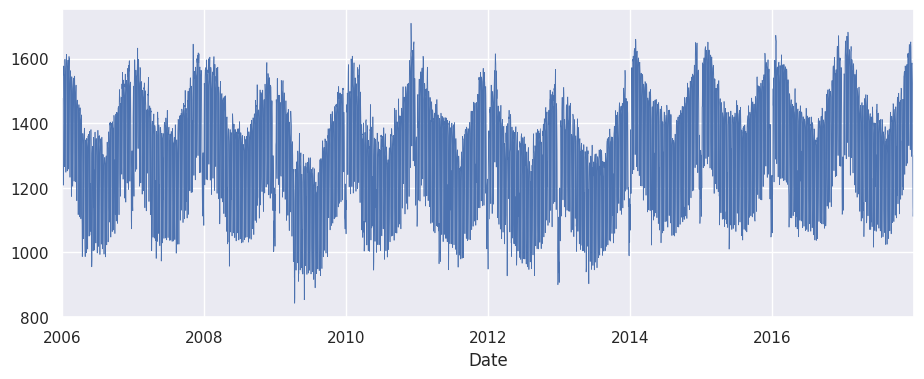

In [168]:
opsd_daily["Consumption"].plot(linewidth=0.5)

In [ ]:
# naredi tri grafe
# 1-graf poraba
# 2-graf proizvodnjo soncne energije
# 3-graf proizvodnja vetrne energije
# uporabi pikce namesto krivulj

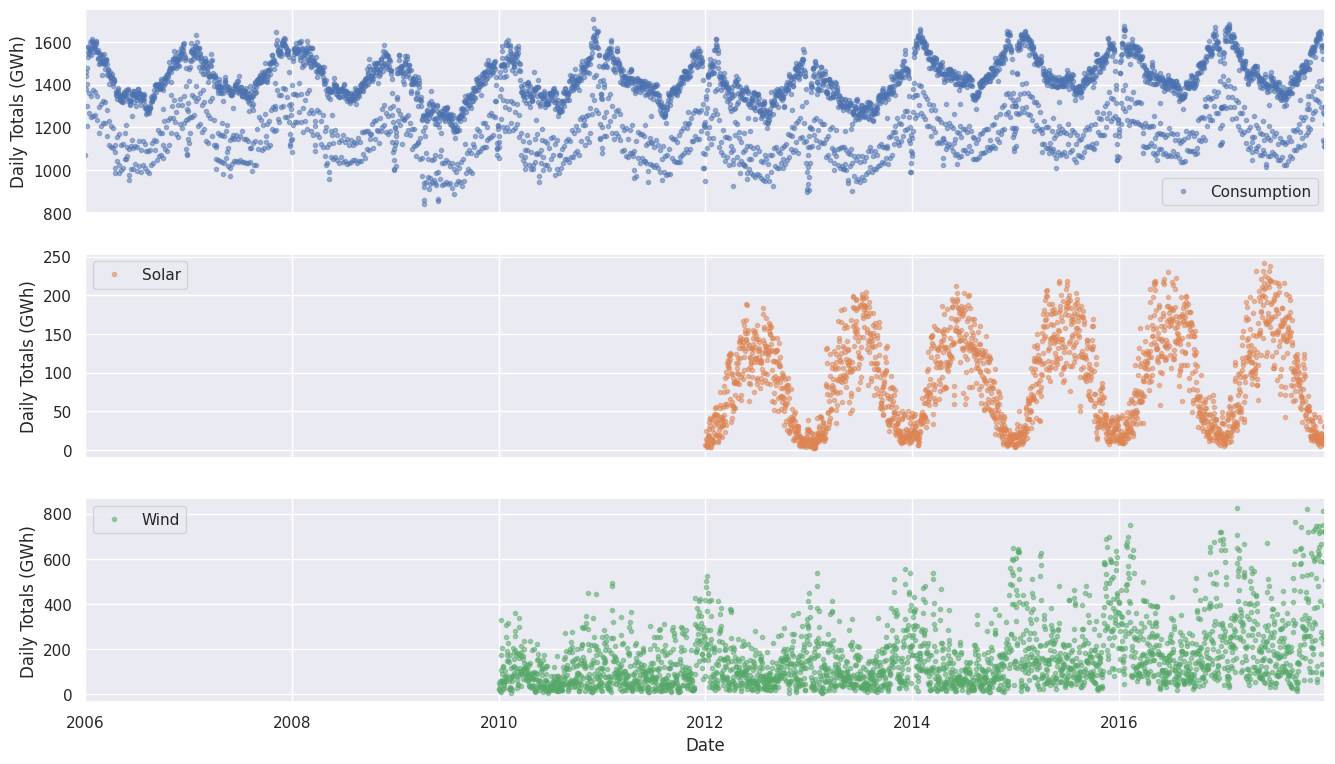

In [181]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker=".", linestyle="None", alpha=0.5, subplots=True, figsize=(16,9))
for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")


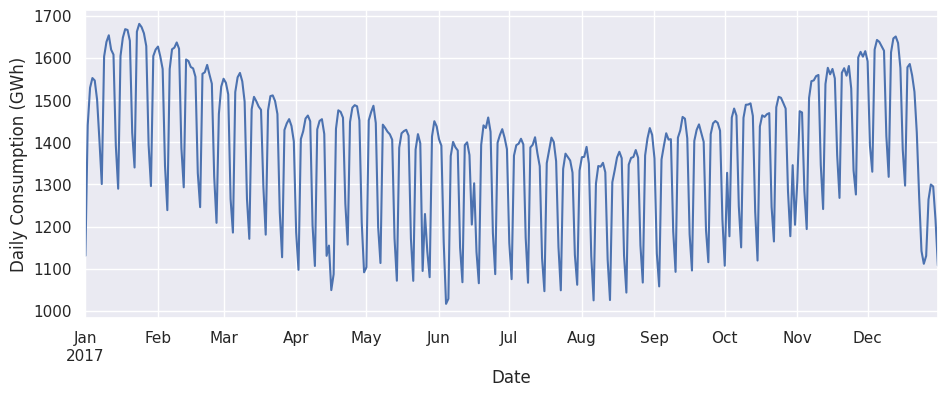

In [182]:
ax = opsd_daily.loc["2017", "Consumption"].plot()

ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

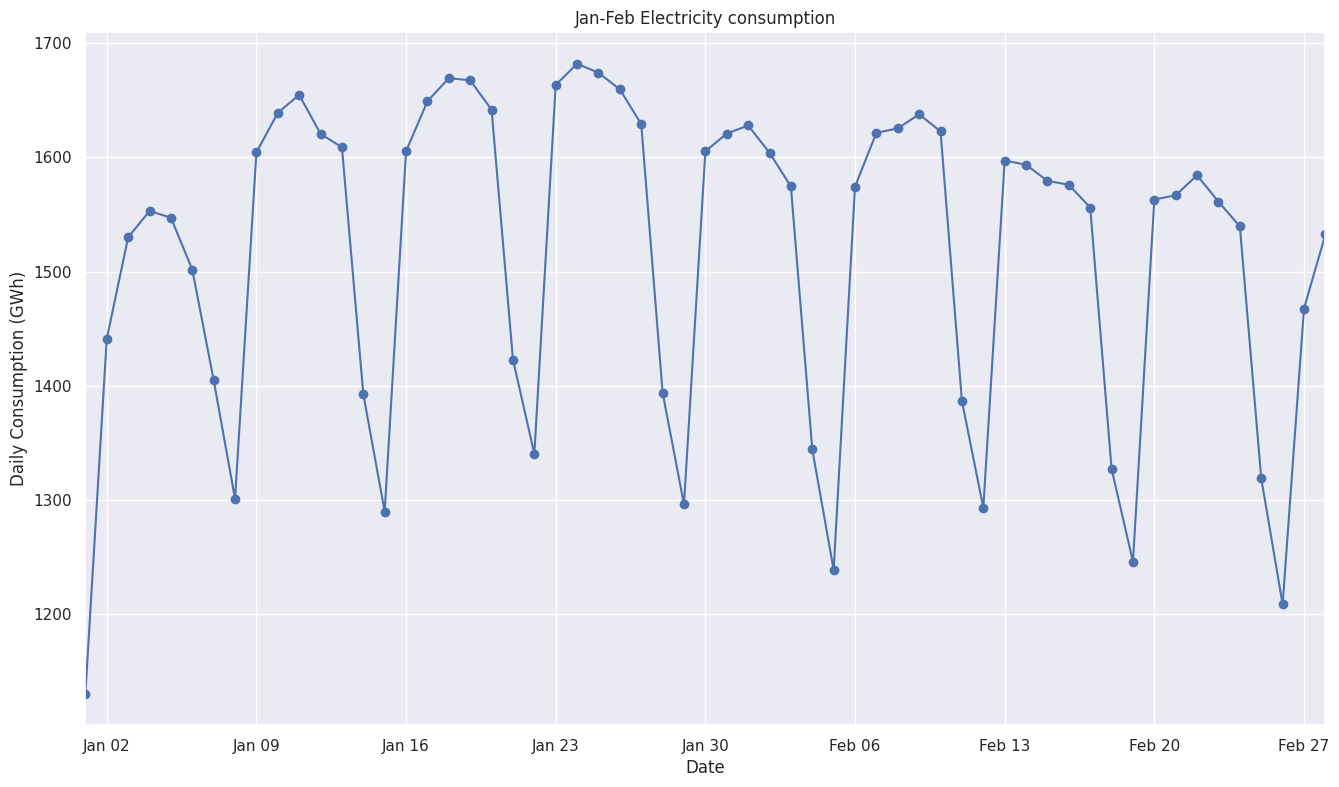

In [197]:

fig, ax = plt.subplots()
ax = opsd_daily.loc["2017-01":"2017-02", "Consumption"].plot(marker="o", linestyle="-",figsize=(16,9))

ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb Electricity consumption')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.show()

## Customizing time series plots

In [ ]:
import matplotlib.dates as mdates

In [ ]:
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')




plt.show()

## Seasonality

In [200]:
# zip funkcija
list1 = [1,2,3]
list2 = ["a", "b", "c"]
list(zip(list1,list2))

[(1, 'a'), (2, 'b'), (3, 'c')]

<img src="images/1_NRlqiZGQdsIyAu0KzP7LaQ.png">

**Python zip**

In [201]:
numberList = [1, 2, 3]
strList = ['one', 'two', 'three']

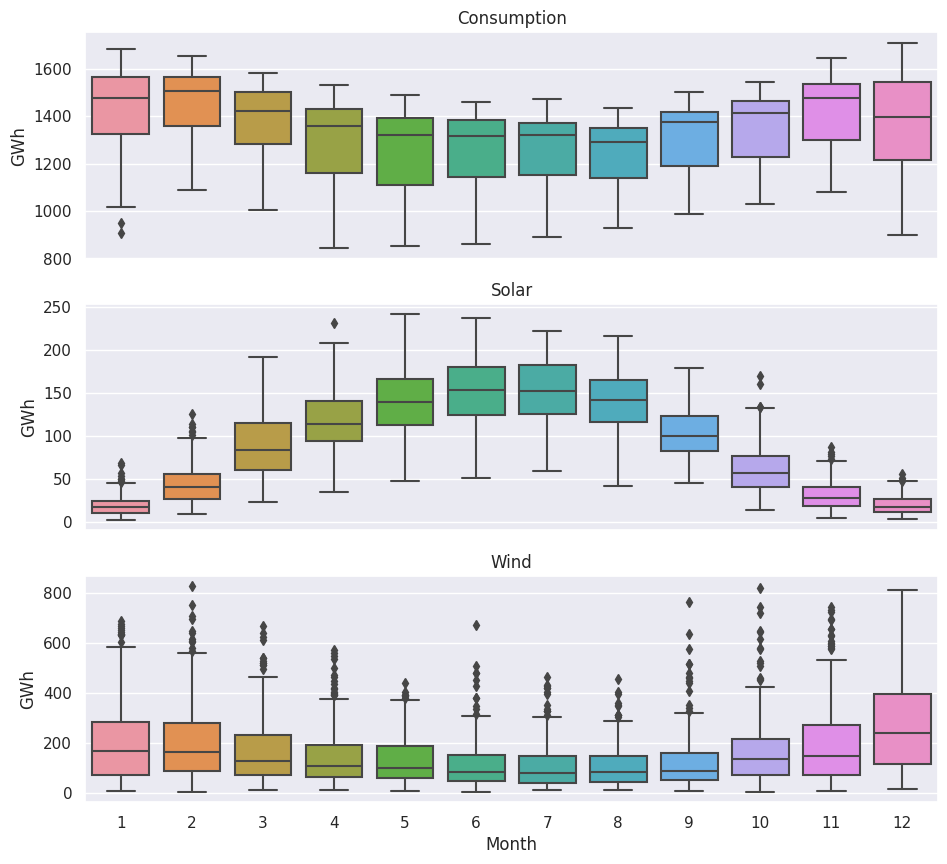

In [206]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x="Month", y=name, ax=ax) # boxplot po argumentu x (abscisa) grupira vse podate iz dataseta
    ax.set_ylabel("GWh")
    ax.set_title(name)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel("")
plt.show()

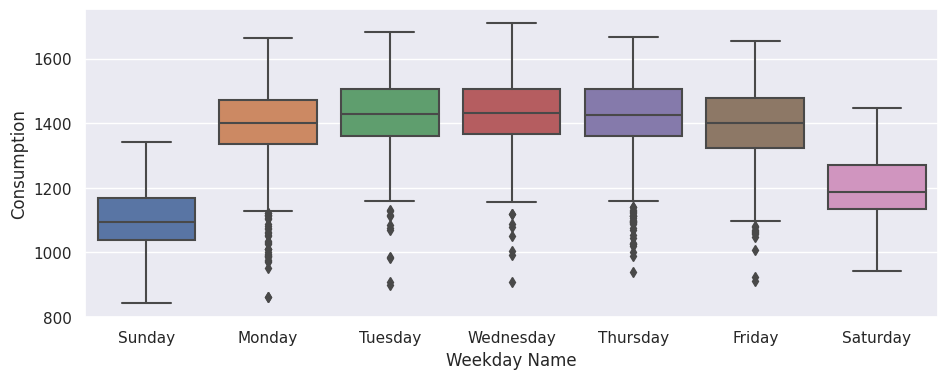

In [208]:
sns.boxplot(data=opsd_daily, x="Weekday Name", y="Consumption")
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot



## Frequencies

In [ ]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

<table>
<thead><tr>
<th>Code</th>
<th>Description</th>
<th>Code</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>D</code></td>
<td>Calendar day</td>
<td><code>B</code></td>
<td>Business day</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Weekly</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month end</td>
<td><code>BM</code></td>
<td>Business month end</td>
</tr>
<tr>
<td><code>Q</code></td>
<td>Quarter end</td>
<td><code>BQ</code></td>
<td>Business quarter end</td>
</tr>
<tr>
<td><code>A</code></td>
<td>Year end</td>
<td><code>BA</code></td>
<td>Business year end</td>
</tr>
<tr>
<td><code>H</code></td>
<td>Hours</td>
<td><code>BH</code></td>
<td>Business hours</td>
</tr>
<tr>
<td><code>T</code></td>
<td>Minutes</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>S</code></td>
<td>Seconds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>L</code></td>
<td>Milliseonds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>U</code></td>
<td>Microseconds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>N</code></td>
<td>nanoseconds</td>
<td></td>
<td></td>
</tr>
</tbody>
</table>

<table>
<thead><tr>
<th>Code</th>
<th>Description</th>
<th></th>
<th>Code</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>MS</code></td>
<td>Month start</td>
<td></td>
<td><code>BMS</code></td>
<td>Business month start</td>
</tr>
<tr>
<td><code>QS</code></td>
<td>Quarter start</td>
<td></td>
<td><code>BQS</code></td>
<td>Business quarter start</td>
</tr>
<tr>
<td><code>AS</code></td>
<td>Year start</td>
<td></td>
<td><code>BAS</code></td>
<td>Business year start</td>
</tr>
</tbody>
</table>

In [210]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consum_sample = opsd_daily.loc[times_sample, ["Consumption"]].copy()
consum_sample


,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [211]:
# avtomatsko doda manjkajoce datume
consum_sample.asfreq("D")

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [214]:
consum_sample.asfreq("D", method="ffill")

,Consumption
2013-02-03,1109.639
2013-02-04,1109.639
2013-02-05,1109.639
2013-02-06,1451.449
2013-02-07,1451.449
2013-02-08,1433.098


## Resampling

In [225]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample("W-MON").mean() # W-MON pomeni da teden stejemo s ponedeljkom, default je W-MON
opsd_weekly_mean.tail(10)



,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-30,1399.414497,506.887000,49.993143,556.880143
2017-11-06,1348.992761,256.750000,45.570714,302.320714
2017-11-13,1476.851301,288.738143,20.657429,309.395571
2017-11-20,1495.704470,354.950286,25.441571,380.391857
2017-11-27,1493.796077,504.559857,26.856571,531.416429
2017-12-04,1538.921973,246.694000,16.715714,263.409714
2017-12-11,1553.850809,627.273429,15.714857,642.988286
2017-12-18,1538.790056,402.493857,19.604857,422.098714
2017-12-25,1373.569914,403.728000,9.876286,413.604286


In [226]:
opsd_weekly_mean.index

DatetimeIndex(['2006-01-02', '2006-01-09', '2006-01-16', '2006-01-23',
               '2006-01-30', '2006-02-06', '2006-02-13', '2006-02-20',
               '2006-02-27', '2006-03-06',
               ...
               '2017-10-30', '2017-11-06', '2017-11-13', '2017-11-20',
               '2017-11-27', '2017-12-04', '2017-12-11', '2017-12-18',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', name='Date', length=627, freq='W-MON')

In [227]:
opsd_daily.shape

(4383, 7)

In [228]:
opsd_weekly_mean.shape

(627, 4)

Na isti graf narišemo denvno premikanje in povprečno tedensko premikanje

In [229]:
start, end = '2017-01', '2017-06'

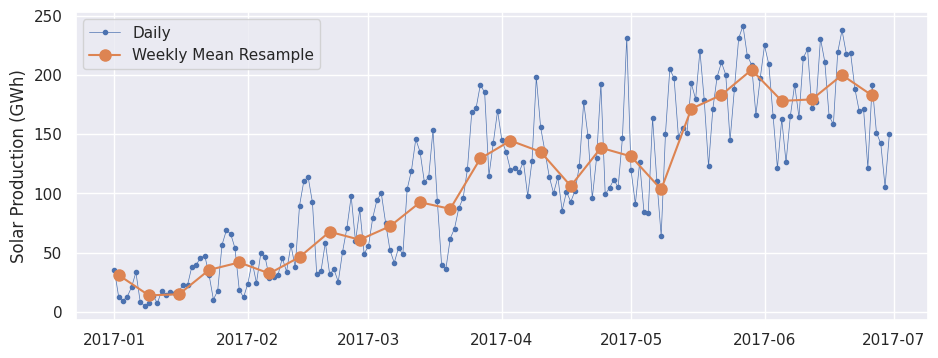

In [230]:
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
        marker='.', 
        linestyle='-', 
        linewidth=0.5, 
        label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], 
        marker='o', 
        markersize=8, 
        linestyle='-', 
        label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [236]:
opsd_monthly = opsd_daily[data_columns].resample("M").sum(min_count=28) # pogoj, koliko minimalno recordov mora biti, da lahko iz meseca naredi nek reprezentatiev sum
opsd_monthly.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-31,42355.21893,12480.097,2130.557,14610.654
2017-11-30,44339.72455,10259.001,831.044,11090.045
2017-12-31,44511.10431,14725.436,494.171,15219.607


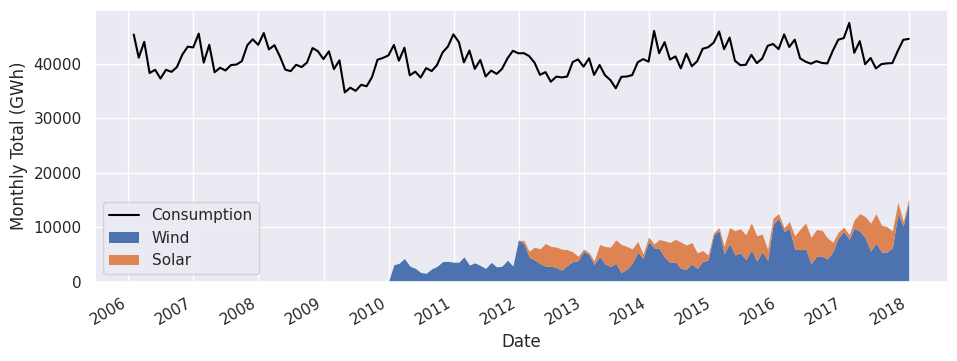

In [241]:
fig, ax = plt.subplots()

ax.plot(opsd_monthly['Consumption'], 
        color='black', 
        label='Consumption')

opsd_monthly[["Wind", "Solar"]].plot.area(ax=ax, linewidth=0) #ax=ax pomeni da želimo v istem grafu (kot je definira zgoraj) še narisati to
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)')
plt.show()

In [249]:
opsd_annual = opsd_daily[data_columns].resample("A").sum(min_count=360)
opsd_annual.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.536,NaN,NaN,NaN
2007-12-31,496631.847,NaN,NaN,NaN
2008-12-31,495570.876,NaN,NaN,NaN
2009-12-31,459737.428,NaN,NaN,NaN
2010-12-31,488588.700,35911.777,NaN,NaN


In [250]:
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = "Year"
opsd_annual

,Consumption,Wind,Solar,Wind+Solar
Year,,,,
2006,489068.53600,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999
2013,463336.85300,47197.832,29559.780,76697.443
2014,504164.82100,51107.672,32498.307,83370.502


In [251]:
opsd_annual["Wind+Solar/Consumption"] = opsd_annual["Wind+Solar"]/opsd_annual["Consumption"]

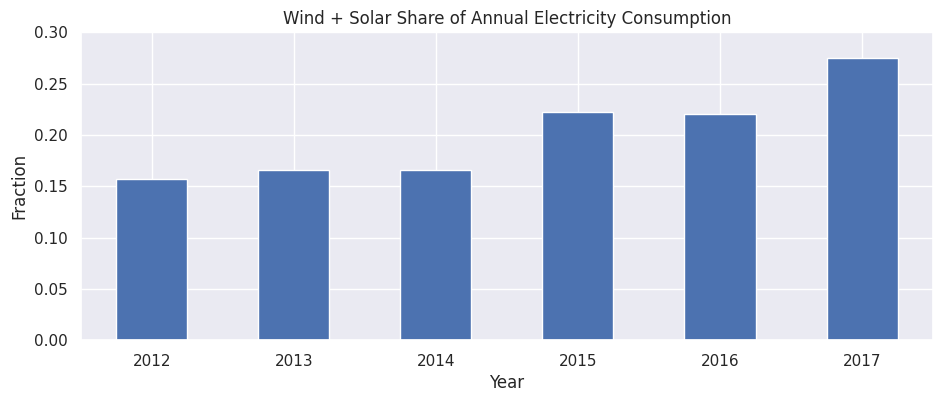

In [252]:

ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)
plt.show()

## Rolling windows

<img src="images/rollingwindow.png">

In [254]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


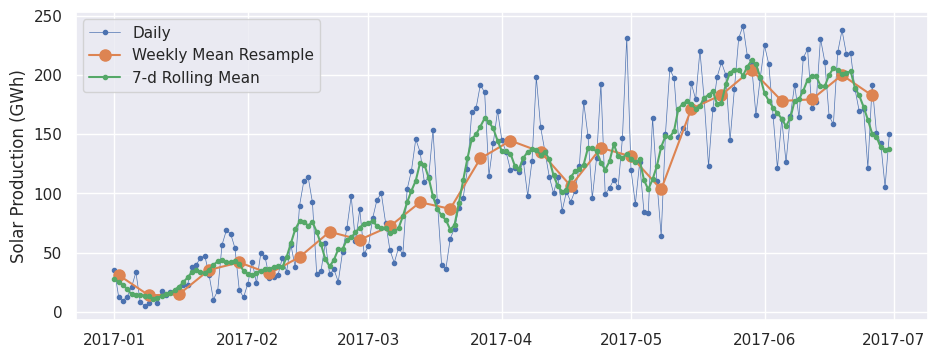

In [255]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'], 
        marker='.', 
        linestyle='-', 
        linewidth=0.5, 
        label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], 
        marker='o', 
        markersize=8, 
        linestyle='-', 
        label='Weekly Mean Resample')

ax.plot(opsd_7d.loc[start:end, 'Solar'], 
        marker='.', 
        linestyle='-', 
        label='7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

## Trends

In [257]:
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()
opsd_365d.sample(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2007-06-04,1359.997197,NaN,NaN,NaN
2006-02-09,NaN,NaN,NaN,NaN
2012-07-10,1281.248962,121.975490,76.391104,198.366595
2013-11-12,1318.819940,144.415538,88.876548,233.684989
2014-10-17,1382.833633,155.601342,88.443208,244.044551
2015-01-02,1382.343074,166.286236,89.948964,256.235200
2014-03-07,1353.875164,144.427574,89.030829,233.851798
2010-12-13,1346.193564,102.135184,NaN,NaN
2008-12-09,1300.624444,NaN,NaN,NaN


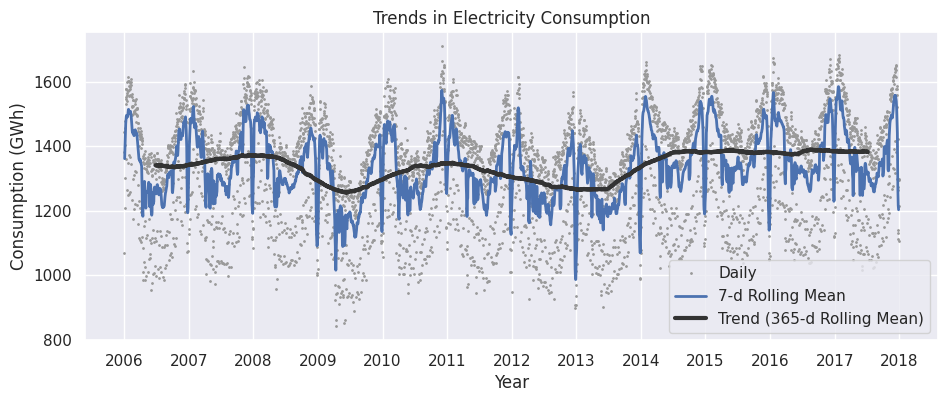

In [258]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(opsd_daily['Consumption'], 
        marker='.', 
        markersize=2, 
        color='0.6',
        linestyle='None', 
        label='Daily')

ax.plot(opsd_7d['Consumption'], 
        linewidth=2, 
        label='7-d Rolling Mean')

ax.plot(opsd_365d['Consumption'], 
        color='0.2', 
        linewidth=3,
        label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

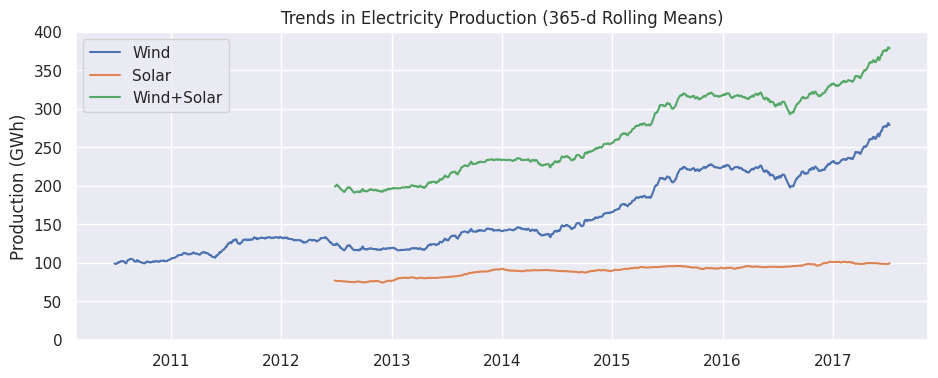

In [260]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()

for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)

# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()